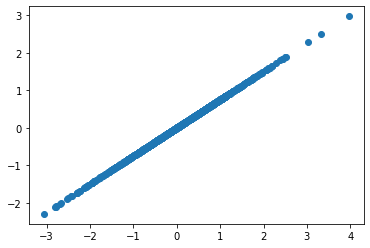

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
import math

## Load data from files
data_linear = np.loadtxt('./linear_function_data.txt')
data_nonlinear = np.loadtxt('./nonlinear_function_data.txt')

xl, yl = data_linear.T
xn, yn = data_nonlinear.T

plt.scatter(xl,yl)
plt.show()

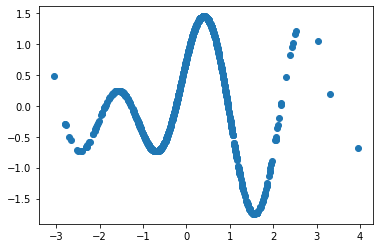

In [2]:
plt.scatter(xn,yn)
plt.show()

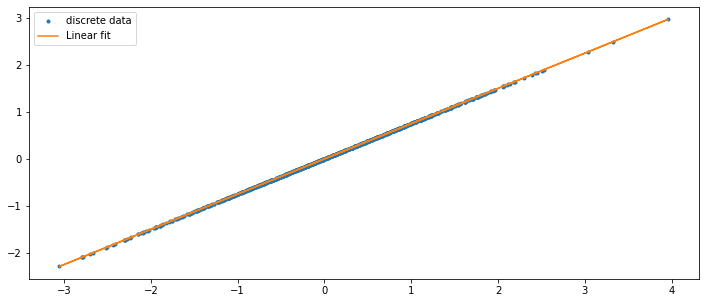

In [10]:
def least_squares(x ,y):
    a = np.vstack([x, np.ones(len(x))]).T
    return np.dot(np.linalg.inv(np.dot(a.T, a)), np.dot(a.T, y))

ml, cl = least_squares(xl, yl)
mn, cn = least_squares(xn, yn)

mll, cll = least_squares(xl, yl)
mnl, cnl = least_squares(xn, yn)
yfl = np.polyval([ml, cl], xl)
yfn = np.polyval([mn, cn], xn)

yfll = np.polyval([mll, cll], xl)
yfnl = np.polyval([mnl, cnl], xn)
fig = plt.figure(figsize=(12,5))
plt.plot(xl, yl, '.',label='discrete data')
plt.plot(xl, yfl,label='Linear fit')
plt.legend() 
plt.show()

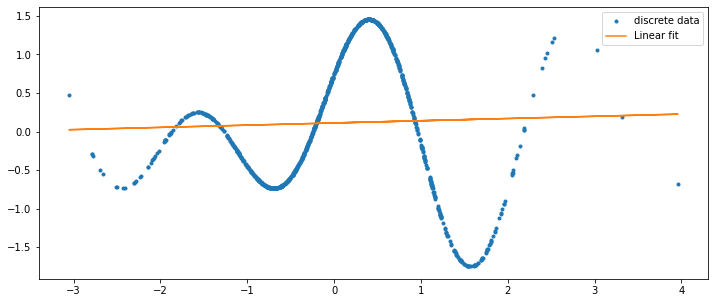

In [16]:
fig = plt.figure(figsize=(12,5))
plt.plot(xn, yn, '.',label='discrete data')
plt.plot(xn, yfn,label='Linear fit')
plt.legend() 
plt.show()

(10, 1000)


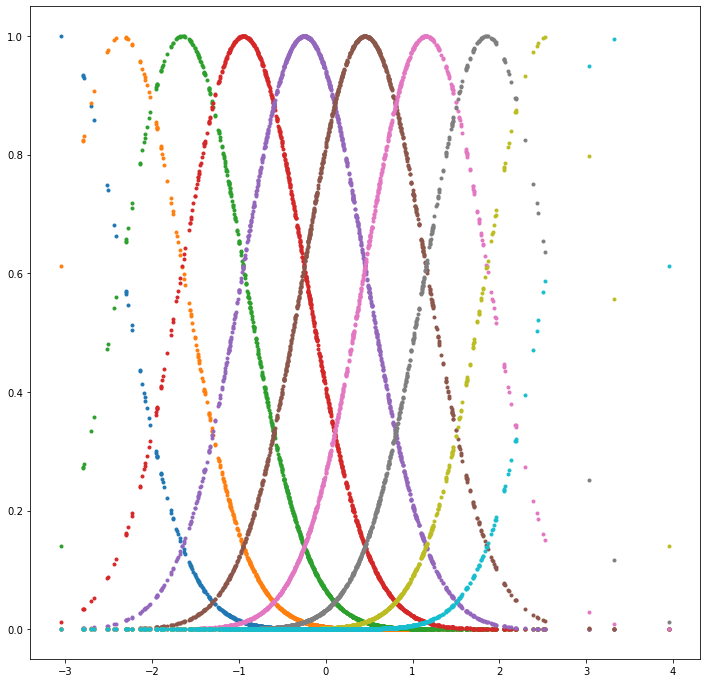

In [12]:
def rbf(x, xl, epsilon, plot=True):
    r = np.exp(-(x-xl)**2 / (epsilon**2))
    if plot:
        plt.plot(x, r, '.')
    return r

def least_squares_radial(x, y, l, epsilon=1, plot=True):

    if plot:
        fig = plt.figure(figsize=(12,12))
    
    points = []
    results = []
    
    for i in range(l):
        points.append(np.min(x) + (i*(np.max(x)-np.min(x))/l))
                          
    for i in range(l):
        xl = np.ones(len(x))*points[i]
        if plot:
            results.append(rbf(x, xl, epsilon))
        else:
            results.append(rbf(x, xl, epsilon, plot=False))
        
    results = np.array(results)
        
    print(results.shape)
     
    if plot:
        plt.show()
        
    c = np.vstack([results, np.ones(results.shape)]).T
    
    return np.linalg.lstsq(c, y, rcond=None)[0]

coef = least_squares_radial(xn, yn, 10)

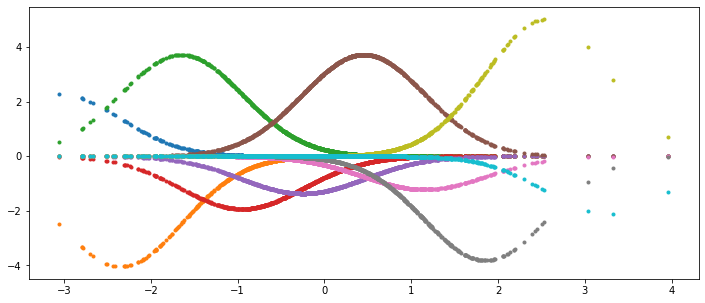

In [13]:
def plot_radials(x, coef, l=10, epsilon=1, plot=False):

    points = []

    final = np.zeros_like(x)

    for i in range(l):
        points.append(np.min(x) + (i*(np.max(x)-np.min(x))/l))

    for i in range(l):
        xl = np.ones(len(x))*points[i]
        
        r = np.exp(-(x-xl)**2 / (epsilon**2))*coef[i]
        final = final + r
        if(plot):
            plt.plot(x, r, '.')
    
    return final

fig = plt.figure(figsize=(12,5))
final = plot_radials(xn, coef, plot=True)
plt.show()

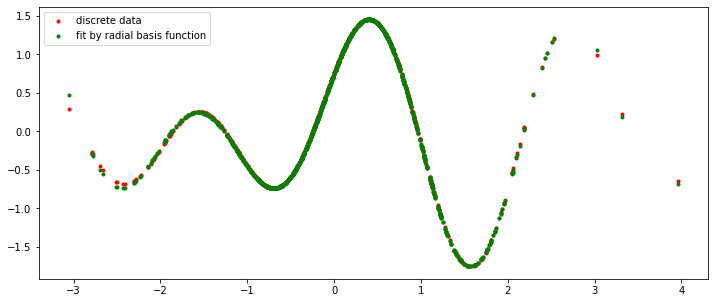

In [17]:
fig = plt.figure(figsize=(12,5))
plt.plot(xn, final, '.r',label='discrete data')
plt.plot(xn, yn, '.g', label='fit by radial basis function')
plt.legend() 
plt.show()